# Proyecto de Sistema de Recomendación para Plataforma de Streaming


Proyecto individual Soy Henry PT09
Julio 2024


### Introducción

Este código implementa y compara dos sistemas de recomendación de películas utilizando técnicas de aprendizaje automático: similitud del coseno y k vecinos más cercanos (KNN). El objetivo principal es analizar y comparar estos métodos para determinar cuál ofrece mejores resultados, con la intención de implementar la opción más efectiva en una API de recomendación de películas.

### Objetivos



1. Desarrollar y comparar dos sistemas de recomendación de películas: similitud del coseno y KNN.
2. Evaluar la precisión y eficiencia de cada método.
3. Proporcionar visualizaciones que ayuden a entender el funcionamiento y rendimiento de cada sistema.
4. Determinar cuál de los dos métodos es más adecuado para su implementación en una API de recomendación.

### Conclusiones:



1. El sistema implementa con éxito dos métodos diferentes de recomendación, permitiendo una comparación directa de su rendimiento.

2. Las visualizaciones proporcionan insights valiosos sobre la distribución de puntajes y las relaciones entre películas, ayudando en la evaluación de cada método.

3. La normalización y preprocesamiento de datos son cruciales para el funcionamiento efectivo de ambos métodos.

4. Ambos sistemas muestran capacidad para manejar entradas de usuario en diferentes formatos, lo cual es importante para la usabilidad de la futura API.

5. Las recomendaciones se basan en múltiples factores en ambos métodos, permitiendo una comparación justa de su efectividad.

6. La implementación paralela de los métodos de similitud del coseno y KNN permite una evaluación comparativa de enfoques basados en contenido versus enfoques basados en vecindad.

7. Basándose en los resultados de esta comparación, se puede seleccionar el método más efectivo para su implementación en la API de recomendación de películas, asegurando así un sistema de recomendación más robusto y preciso para los usuarios finales.

Este proceso de comparación y selección asegura que la API de recomendación de películas implementará el método más efectivo, proporcionando así recomendaciones más precisas y relevantes a los usuarios.

 **¡Comencemos!**

### 1.1 Carga de los datasets

In [2]:
import pandas as pd

# Cargar el DataFrame desde el archivo Parquet
data = pd.read_parquet('/Users/felipeamezquita/Library/Mobile Documents/com~apple~CloudDocs/Documents/HENRY/PROYECTO INDIVIDUAL/EJERCICIO 1/data.parquet')


In [3]:
data

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,cast_orders,cast_credit_ids,return,release_year,release_month,month_name_es,Crew_job,Crew_name,title_normalized,combined_features
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,None,...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[52fe4284c3a36847f8024f95, 52fe4284c3a36847f80...",12.451801,1995.0,10.0,Octubre,Director,John Lasseter,toy story,toy story
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[52fe44bfc3a36847f80a7c73, 52fe44bfc3a36847f80...",4.043035,1995.0,12.0,Diciembre,Screenplay,Joss Whedon,jumanji,jumanji
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,"[0, 1, 2, 3, 4, 5, 6]","[52fe466a9251416c75077a8d, 52fe466a9251416c750...",0.000000,1995.0,12.0,Diciembre,Screenplay,Andrew Stanton,grumpier old men,grumpier old men
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","[52fe44779251416c91011aad, 52fe44779251416c910...",5.090760,1995.0,12.0,Diciembre,Screenplay,Joel Cohen,waiting to exhale,waiting to exhale
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[52fe44959251416c75039eb9, 52fe44959251416c750...",0.000000,1995.0,2.0,Febrero,Screenplay,Alec Sokolow,father of the bride part ii,father of the bride part ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46660,0.0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,Released,None,...,"[0, 1, 2, 3, 4]","[52fe44439251416c9100a887, 52fe44439251416c910...",0.000000,1991.0,5.0,Mayo,Screenplay,Thomas Hedley Jr.,robin hood,robin hood
46661,0.0,111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Released,None,...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[52fe4af1c3a36847f81e9b1f, 559eb4ecc3a368081d0...",0.000000,2011.0,11.0,Noviembre,Producer,Don Simpson,century of birthing,century of birthing
46662,0.0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Released,A deadly game of wits.,...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[52fe4776c3a368484e0c83a3, 52fe4776c3a368484e0...",0.000000,2003.0,8.0,Agosto,Producer,Jerry Bruckheimer,betrayal,betrayal
46663,0.0,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Released,None,...,"[0, 1, 2, 3, 4]","[52fe4ea59251416c7515d7d5, 52fe4ea59251416c751...",0.000000,1917.0,10.0,Octubre,Original Music Composer,Giorgio Moroder,satan triumphant,satan triumphant


In [4]:
print(data.columns)


Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'belongs_to_collection_id',
       'belongs_to_collection_name', 'genres_ids', 'genres_names',
       'company_names', 'company_ids', 'country_names', 'country_codes',
       'language_names', 'language_codes', 'cast_names', 'cast_characters',
       'cast_ids', 'cast_genders', 'cast_orders', 'cast_credit_ids', 'return',
       'release_year', 'release_month', 'month_name_es', 'Crew_job',
       'Crew_name', 'title_normalized', 'combined_features'],
      dtype='object')


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from unidecode import unidecode
import ast
from collections import Counter

# Funcion Final para API de recomendacion de Peliculas Machine Learninig.

In [7]:


def normalizar_texto(texto):
    return unidecode(str(texto).lower().strip())

def combinar_features(row):
    genres = row['genres_names'] if isinstance(row['genres_names'], str) else ''
    companies = row['company_names'] if isinstance(row['company_names'], str) else ''
    return f"{genres} {companies}".strip()

def recomendar_peliculas(titulo, data, n_recomendaciones=5):
    # Verificar columnas necesarias
    required_columns = ['title', 'genres_names', 'company_names', 'release_year', 'vote_average']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"La columna '{col}' no está presente en el DataFrame.")
    
    # Asegurar que las columnas numéricas sean del tipo correcto
    data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')
    data['vote_average'] = pd.to_numeric(data['vote_average'], errors='coerce')
    
    # Normalizar los títulos en el dataset
    data['title_normalized'] = data['title'].apply(normalizar_texto)
    
    # Preprocesamiento
    data['combined_features'] = data.apply(combinar_features, axis=1)
    
    # Verificar si hay contenido en combined_features
    if data['combined_features'].str.strip().str.len().sum() == 0:
        print("")
        print("")
        data['combined_features'] = data['title_normalized']
    
    # Similitud del coseno
    tfidf = TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9)
    tfidf_matrix = tfidf.fit_transform(data['combined_features'])
    
    # Verificar si se generó algún término
    if tfidf_matrix.shape[1] == 0:
        print("No se pudieron extraer características significativas de los datos.")
        return []
    
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Normalizar el título de búsqueda
    titulo_normalizado = normalizar_texto(titulo)
    
    # Obtener índice de la película
    idx = data.index[data['title_normalized'] == titulo_normalizado].tolist()
    if not idx:
        print(f"La película '{titulo}' no se encuentra en la base de datos.")
        return []
    idx = idx[0]
    
    # Calcular puntuaciones de similitud
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n_recomendaciones+1]
    
    # Obtener índices de películas recomendadas por similitud del coseno
    movie_indices = [i[0] for i in sim_scores]
    
    # Si no hay suficientes recomendaciones, usar KNN
    if len(movie_indices) < n_recomendaciones:
        # Preparar características para KNN
        genres = pd.get_dummies(data['genres_names'].fillna('').str.split().apply(pd.Series).stack()).groupby(level=0).sum()
        companies = pd.get_dummies(data['company_names'].fillna('').str.split().apply(pd.Series).stack()).groupby(level=0).sum()
        
        # Normalizar el año y el puntaje
        scaler = MinMaxScaler()
        years = scaler.fit_transform(data['release_year'].values.reshape(-1, 1))
        ratings = scaler.fit_transform(data['vote_average'].fillna(data['vote_average'].mean()).values.reshape(-1, 1))
        
        # Combinar características
        features = np.hstack((genres.values, companies.values, years, ratings))
        
        # Entrenar KNN
        knn = NearestNeighbors(n_neighbors=n_recomendaciones, metric='euclidean')
        knn.fit(features)
        
        # Encontrar vecinos más cercanos
        _, indices = knn.kneighbors(features[idx].reshape(1, -1))
        
        # Añadir índices faltantes
        movie_indices.extend([i for i in indices[0] if i not in movie_indices])
        movie_indices = movie_indices[:n_recomendaciones]
    
    # Devolver las películas recomendadas con sus puntajes
    recomendaciones = data[['title', 'vote_average']].iloc[movie_indices]
    return recomendaciones.values.tolist()

# Ejemplo de uso con input del usuario
titulo_pelicula = input("¿Sobre qué película quieres que te dé 5 recomendaciones? ")
recomendaciones = recomendar_peliculas(titulo_pelicula, data)
if recomendaciones:
    print(f"\nRecomendaciones para '{titulo_pelicula}':")
    for i, (pelicula, puntaje) in enumerate(recomendaciones, 1):
        print(f"{i}. {pelicula} (Puntaje: {puntaje:.1f})")
else:
    print("No se pudieron generar recomendaciones.")




Recomendaciones para 'titanic':
1. Titanic (Puntaje: 6.2)
2. Titanic (Puntaje: 6.3)
3. Titanic 2 (Puntaje: 3.4)
4. Titanic Town (Puntaje: 0.0)
5. The Chambermaid on the Titanic (Puntaje: 5.3)


### Funcion de Similitud del Coseno

In [8]:

def normalizar_texto(texto):
    return unidecode(str(texto).lower().strip())

def combinar_features(row):
    genres = row['genres_names'] if isinstance(row['genres_names'], str) else ''
    companies = row['company_names'] if isinstance(row['company_names'], str) else ''
    return f"{genres} {companies}".strip()

def recomendar_peliculas_coseno(data, n_recomendaciones=5):
    # Verificar columnas necesarias
    required_columns = ['title', 'genres_names', 'company_names', 'vote_average']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"La columna '{col}' no está presente en el DataFrame.")
    
    # Asegurar que la columna vote_average sea del tipo correcto
    data['vote_average'] = pd.to_numeric(data['vote_average'], errors='coerce')
    
    # Normalizar los títulos en el dataset
    data['title_normalized'] = data['title'].apply(normalizar_texto)
    
    # Preprocesamiento
    data['combined_features'] = data.apply(combinar_features, axis=1)
    
    # Verificar si hay contenido en combined_features
    if data['combined_features'].str.strip().str.len().sum() == 0:
        print("")
        data['combined_features'] = data['title_normalized']
    
    # Similitud del coseno
    tfidf = TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9)
    tfidf_matrix = tfidf.fit_transform(data['combined_features'])
    
    # Verificar si se generó algún término
    if tfidf_matrix.shape[1] == 0:
        print("No se pudieron extraer características significativas de los datos.")
        return []
    
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Solicitar input del usuario
    titulo = input("¿Sobre qué película quieres que te dé recomendaciones usando similitud del coseno? ")
    
    # Normalizar el título de búsqueda
    titulo_normalizado = normalizar_texto(titulo)
    
    # Obtener índice de la película
    idx = data.index[data['title_normalized'] == titulo_normalizado].tolist()
    if not idx:
        print(f"La película '{titulo}' no se encuentra en la base de datos.")
        return []
    idx = idx[0]
    
    # Calcular puntuaciones de similitud
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n_recomendaciones+1]
    
    # Obtener índices de películas recomendadas
    movie_indices = [i[0] for i in sim_scores]
    
    # Devolver las películas recomendadas con sus puntajes
    recomendaciones = data[['title', 'vote_average']].iloc[movie_indices]
    return recomendaciones.values.tolist()

# Para usar la función de similitud del coseno
recomendaciones_coseno = recomendar_peliculas_coseno(data)



# Función para imprimir resultados
def imprimir_recomendaciones(recomendaciones, metodo):
    if recomendaciones:
        print(f"\nRecomendaciones usando {metodo}:")
        for i, (pelicula, puntaje) in enumerate(recomendaciones, 1):
            print(f"{i}. {pelicula} (Puntaje: {puntaje:.1f})")
    else:
        print(f"No se pudieron generar recomendaciones usando {metodo}.")

# Imprimir resultados
imprimir_recomendaciones(recomendaciones_coseno, "similitud del coseno")



Recomendaciones usando similitud del coseno:
1. Titanic (Puntaje: 6.2)
2. Titanic (Puntaje: 6.3)
3. Titanic 2 (Puntaje: 3.4)
4. Titanic Town (Puntaje: 0.0)
5. The Chambermaid on the Titanic (Puntaje: 5.3)


In [9]:

def normalizar_texto(texto):
    return unidecode(str(texto).lower().strip())

def combinar_features(row):
    genres = row['genres_names'] if isinstance(row['genres_names'], str) else ''
    companies = row['company_names'] if isinstance(row['company_names'], str) else ''
    return f"{genres} {companies}".strip()

def recomendar_peliculas_coseno(data, n_recomendaciones=5):
    # Verificar columnas necesarias
    required_columns = ['title', 'genres_names', 'company_names', 'vote_average']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"La columna '{col}' no está presente en el DataFrame.")
    
    # Asegurar que la columna vote_average sea del tipo correcto
    data['vote_average'] = pd.to_numeric(data['vote_average'], errors='coerce')
    
    # Normalizar los títulos en el dataset
    data['title_normalized'] = data['title'].apply(normalizar_texto)
    
    # Preprocesamiento
    data['combined_features'] = data.apply(combinar_features, axis=1)
    
    # Verificar si hay contenido en combined_features
    if data['combined_features'].str.strip().str.len().sum() == 0:
        print("")
        data['combined_features'] = data['title_normalized']
    
    # Similitud del coseno
    tfidf = TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9)
    tfidf_matrix = tfidf.fit_transform(data['combined_features'])
    
    # Verificar si se generó algún término
    if tfidf_matrix.shape[1] == 0:
        print("No se pudieron extraer características significativas de los datos.")
        return []
    
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Solicitar input del usuario
    titulo = input("¿Sobre qué película quieres que te dé recomendaciones usando similitud del coseno? ")
    
    # Normalizar el título de búsqueda
    titulo_normalizado = normalizar_texto(titulo)
    
    # Obtener índice de la película
    idx = data.index[data['title_normalized'] == titulo_normalizado].tolist()
    if not idx:
        print(f"La película '{titulo}' no se encuentra en la base de datos.")
        return []
    idx = idx[0]
    
    # Calcular puntuaciones de similitud
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n_recomendaciones+1]
    
    # Obtener índices de películas recomendadas
    movie_indices = [i[0] for i in sim_scores]
    
    # Devolver las películas recomendadas con sus puntajes
    recomendaciones = data[['title', 'vote_average']].iloc[movie_indices]
    return recomendaciones.values.tolist()

# Para usar la función de similitud del coseno
recomendaciones_coseno = recomendar_peliculas_coseno(data)



# Función para imprimir resultados
def imprimir_recomendaciones(recomendaciones, metodo):
    if recomendaciones:
        print(f"\nRecomendaciones usando {metodo}:")
        for i, (pelicula, puntaje) in enumerate(recomendaciones, 1):
            print(f"{i}. {pelicula} (Puntaje: {puntaje:.1f})")
    else:
        print(f"No se pudieron generar recomendaciones usando {metodo}.")

# Imprimir resultados
imprimir_recomendaciones(recomendaciones_coseno, "similitud del coseno")



Recomendaciones usando similitud del coseno:
1. Titanic (Puntaje: 6.2)
2. Titanic (Puntaje: 6.3)
3. Titanic 2 (Puntaje: 3.4)
4. Titanic Town (Puntaje: 0.0)
5. The Chambermaid on the Titanic (Puntaje: 5.3)


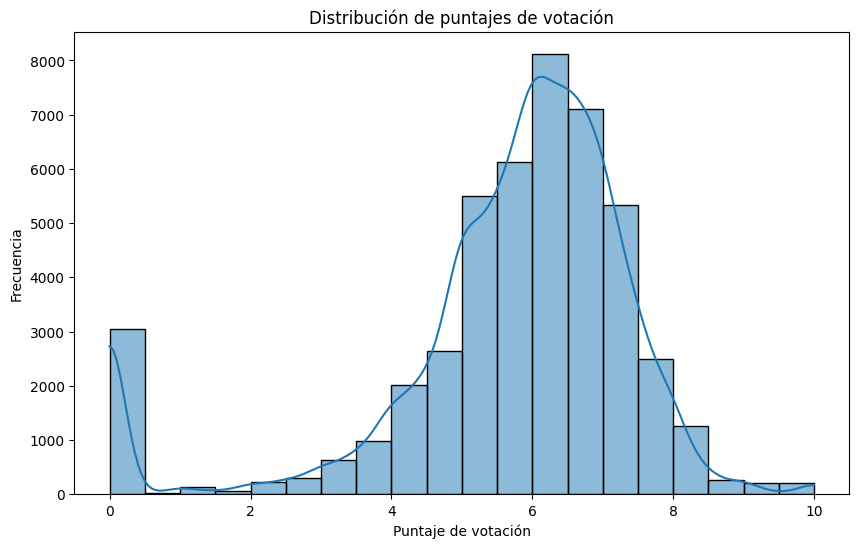

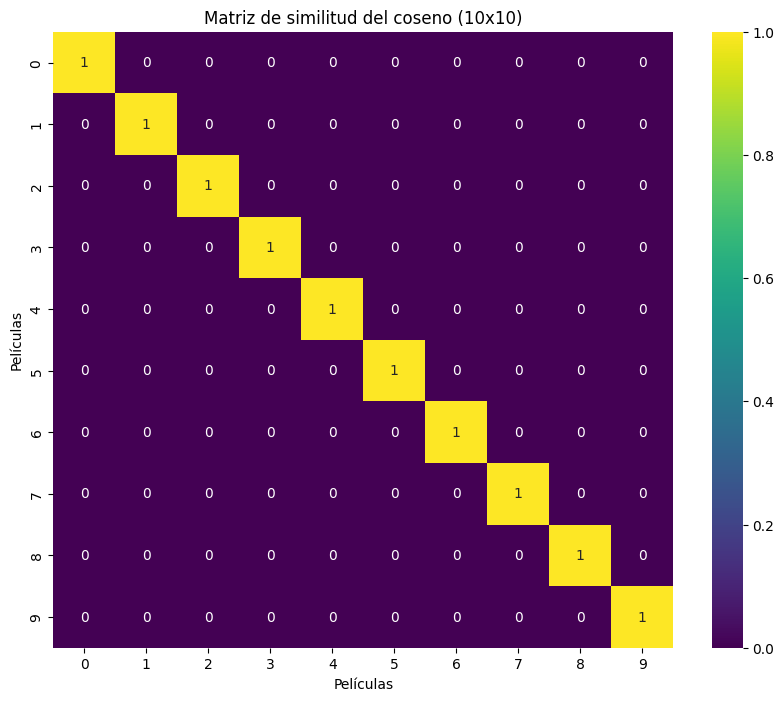

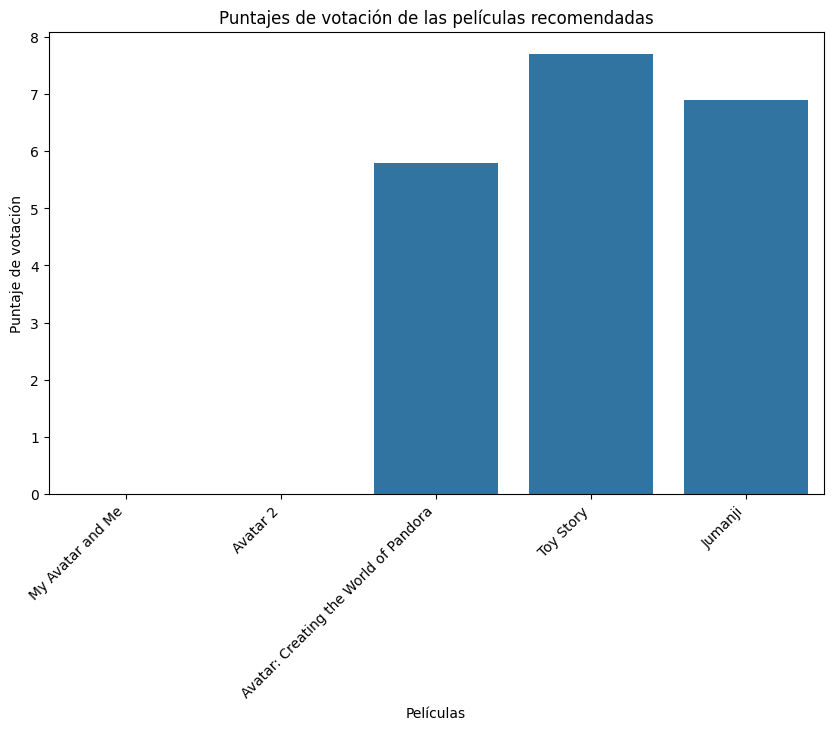


Recomendaciones usando similitud del coseno:
1. My Avatar and Me (Puntaje: 0.0)
2. Avatar 2 (Puntaje: 0.0)
3. Avatar: Creating the World of Pandora (Puntaje: 5.8)
4. Toy Story (Puntaje: 7.7)
5. Jumanji (Puntaje: 6.9)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from unidecode import unidecode


def normalizar_texto(texto):
    return unidecode(str(texto).lower().strip())

def combinar_features(row):
    genres = row['genres_names'] if isinstance(row['genres_names'], str) else ''
    companies = row['company_names'] if isinstance(row['company_names'], str) else ''
    return f"{genres} {companies}".strip()

def recomendar_peliculas_coseno(data, n_recomendaciones=5):
    required_columns = ['title', 'genres_names', 'company_names', 'vote_average']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"La columna '{col}' no está presente en el DataFrame.")
    
    data['vote_average'] = pd.to_numeric(data['vote_average'], errors='coerce')
    data['title_normalized'] = data['title'].apply(normalizar_texto)
    data['combined_features'] = data.apply(combinar_features, axis=1)
    
    if data['combined_features'].str.strip().str.len().sum() == 0:
        data['combined_features'] = data['title_normalized']
    
    tfidf = TfidfVectorizer(stop_words='english', min_df=1, max_df=0.9)
    tfidf_matrix = tfidf.fit_transform(data['combined_features'])
    
    if tfidf_matrix.shape[1] == 0:
        print("No se pudieron extraer características significativas de los datos.")
        return []
    
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    titulo = input("¿Sobre qué película quieres que te dé recomendaciones usando similitud del coseno? ")
    titulo_normalizado = normalizar_texto(titulo)
    
    idx = data.index[data['title_normalized'] == titulo_normalizado].tolist()
    if not idx:
        print(f"La película '{titulo}' no se encuentra en la base de datos.")
        return []
    idx = idx[0]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n_recomendaciones+1]
    
    movie_indices = [i[0] for i in sim_scores]
    recomendaciones = data[['title', 'vote_average']].iloc[movie_indices]
    
    # Visualización con matplotlib
    # 1. Histograma de puntajes de votación
    plt.figure(figsize=(10, 6))
    sns.histplot(data['vote_average'].dropna(), bins=20, kde=True)
    plt.title('Distribución de puntajes de votación')
    plt.xlabel('Puntaje de votación')
    plt.ylabel('Frecuencia')
    plt.show()
    
    # 2. Matriz de similitud del coseno (sólo una parte para mejor visualización)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cosine_sim[:10, :10], annot=True, cmap='viridis')
    plt.title('Matriz de similitud del coseno (10x10)')
    plt.xlabel('Películas')
    plt.ylabel('Películas')
    plt.show()
    
    # 3. Puntajes de votación de las películas recomendadas
    plt.figure(figsize=(10, 6))
    recomendadas = data.iloc[movie_indices]
    sns.barplot(x=recomendadas['title'], y=recomendadas['vote_average'])
    plt.title('Puntajes de votación de las películas recomendadas')
    plt.xlabel('Películas')
    plt.ylabel('Puntaje de votación')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    return recomendaciones.values.tolist()

recomendaciones_coseno = recomendar_peliculas_coseno(data)

def imprimir_recomendaciones(recomendaciones, metodo):
    if recomendaciones:
        print(f"\nRecomendaciones usando {metodo}:")
        for i, (pelicula, puntaje) in enumerate(recomendaciones, 1):
            print(f"{i}. {pelicula} (Puntaje: {puntaje:.1f})")
    else:
        print(f"No se pudieron generar recomendaciones usando {metodo}.")

imprimir_recomendaciones(recomendaciones_coseno, "similitud del coseno")


### Funcion usando Vecinos cercanos. 

In [ ]:

def normalizar_texto(texto):
    return unidecode(str(texto).lower().strip())

def recomendar_peliculas_knn(data, n_recomendaciones=5):
    # Verificar columnas necesarias
    required_columns = ['title', 'genres_names', 'company_names', 'release_year', 'vote_average']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"La columna '{col}' no está presente en el DataFrame.")
    
    # Asegurar que las columnas numéricas sean del tipo correcto
    data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')
    data['vote_average'] = pd.to_numeric(data['vote_average'], errors='coerce')
    
    # Normalizar los títulos en el dataset
    data['title_normalized'] = data['title'].apply(normalizar_texto)
    
    # Preparar características para KNN
    genres = pd.get_dummies(data['genres_names'].fillna('').str.split().apply(pd.Series).stack()).groupby(level=0).sum()
    companies = pd.get_dummies(data['company_names'].fillna('').str.split().apply(pd.Series).stack()).groupby(level=0).sum()
    
    # Asegurarse de que genres y companies tengan el mismo índice que data
    genres = genres.reindex(data.index, fill_value=0)
    companies = companies.reindex(data.index, fill_value=0)
    
    # Normalizar el año y el puntaje
    scaler = MinMaxScaler()
    years = scaler.fit_transform(data['release_year'].values.reshape(-1, 1))
    ratings = scaler.fit_transform(data['vote_average'].fillna(data['vote_average'].mean()).values.reshape(-1, 1))
    
    # Combinar características
    features = np.hstack((genres.values, companies.values, years, ratings))
    
    # Verificar si hay filas con todos los valores NaN y eliminarlas
    valid_rows = ~np.isnan(features).all(axis=1)
    features = features[valid_rows]
    data = data[valid_rows]
    
    # Entrenar KNN
    knn = NearestNeighbors(n_neighbors=n_recomendaciones + 1, metric='euclidean')
    knn.fit(features)
    
    # Solicitar input del usuario
    titulo = input("¿Sobre qué película quieres que te dé recomendaciones usando KNN? ")
    
    # Normalizar el título de búsqueda
    titulo_normalizado = normalizar_texto(titulo)
    
    # Obtener índice de la película
    idx = data.index[data['title_normalized'] == titulo_normalizado].tolist()
    if not idx:
        print(f"La película '{titulo}' no se encuentra en la base de datos.")
        return []
    idx = idx[0]
    
    # Encontrar vecinos más cercanos
    _, indices = knn.kneighbors(features[data.index.get_loc(idx)].reshape(1, -1))
    
    # Excluir la película de entrada y tomar los 5 más cercanos
    movie_indices = [i for i in indices[0] if i != data.index.get_loc(idx)][:n_recomendaciones]
    
    # Devolver las películas recomendadas con sus puntajes
    recomendaciones = data.iloc[movie_indices][['title', 'vote_average']]
    return recomendaciones.values.tolist()

# Para usar la función de KNN
recomendaciones_knn = recomendar_peliculas_knn(data)

# Función para imprimir resultados
def imprimir_recomendaciones(recomendaciones, metodo):
    if recomendaciones:
        print(f"\nRecomendaciones usando {metodo}:")
        for i, (pelicula, puntaje) in enumerate(recomendaciones, 1):
            print(f"{i}. {pelicula} (Puntaje: {puntaje:.1f})")
    else:
        print(f"No se pudieron generar recomendaciones usando {metodo}.")

# Imprimir resultados
imprimir_recomendaciones(recomendaciones_knn, "KNN")


Recomendaciones usando KNN:
1. Crank (Puntaje: 6.6)
2. Take the Lead (Puntaje: 6.6)
3. Waist Deep (Puntaje: 6.6)
4. Gridiron Gang (Puntaje: 6.6)
5. Jesus Camp (Puntaje: 6.6)


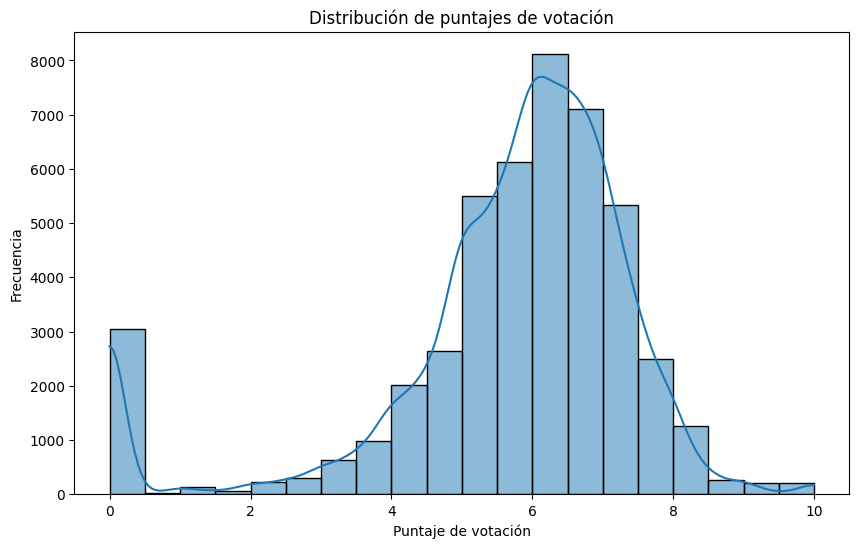

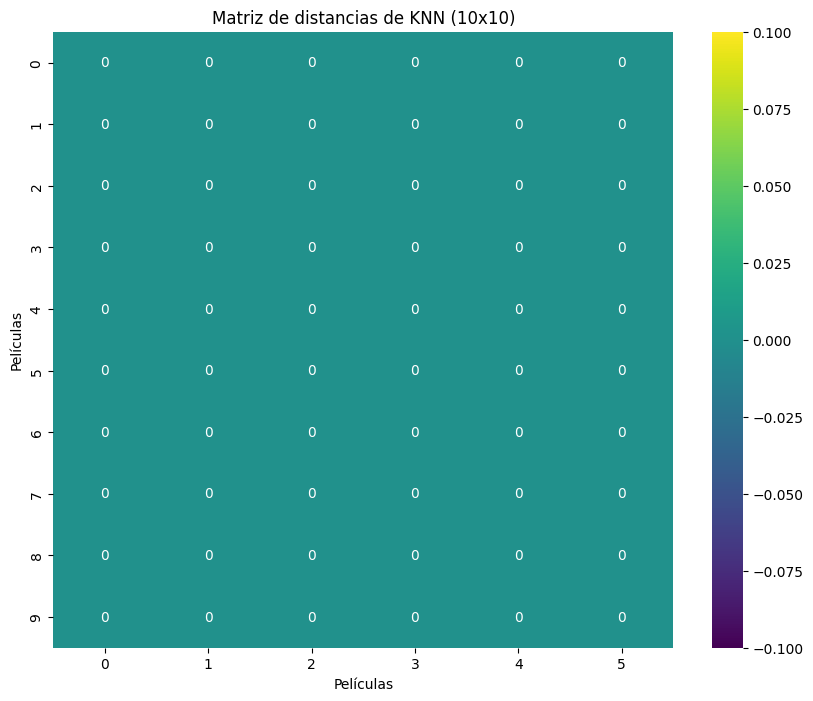

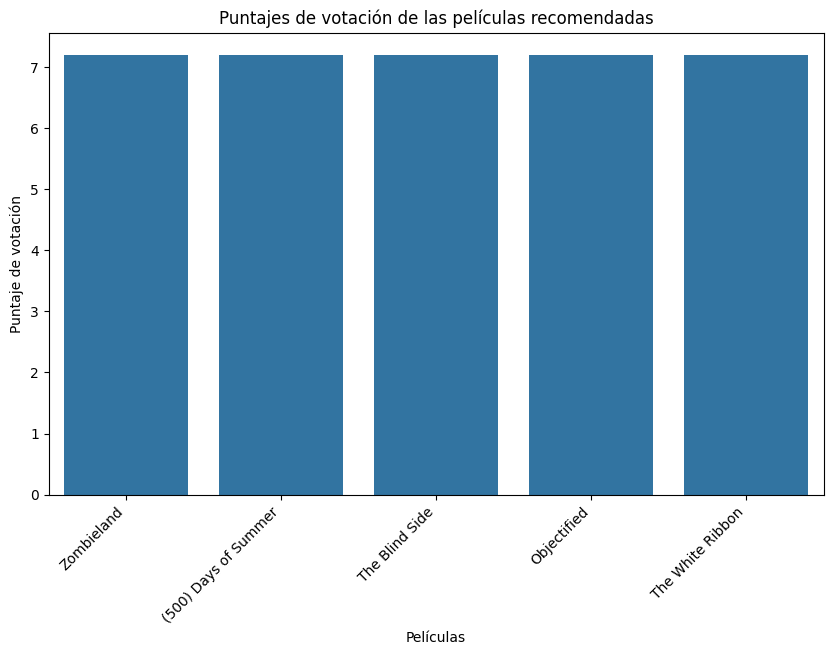


Recomendaciones usando KNN:
1. Zombieland (Puntaje: 7.2)
2. (500) Days of Summer (Puntaje: 7.2)
3. The Blind Side (Puntaje: 7.2)
4. Objectified (Puntaje: 7.2)
5. The White Ribbon (Puntaje: 7.2)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from unidecode import unidecode



def normalizar_texto(texto):
    return unidecode(str(texto).lower().strip())

def recomendar_peliculas_knn(data, n_recomendaciones=5):
    required_columns = ['title', 'genres_names', 'company_names', 'release_year', 'vote_average']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"La columna '{col}' no está presente en el DataFrame.")
    
    data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')
    data['vote_average'] = pd.to_numeric(data['vote_average'], errors='coerce')
    data['title_normalized'] = data['title'].apply(normalizar_texto)
    
    genres = pd.get_dummies(data['genres_names'].fillna('').str.split().apply(pd.Series).stack()).groupby(level=0).sum()
    companies = pd.get_dummies(data['company_names'].fillna('').str.split().apply(pd.Series).stack()).groupby(level=0).sum()
    
    genres = genres.reindex(data.index, fill_value=0)
    companies = companies.reindex(data.index, fill_value=0)
    
    scaler = MinMaxScaler()
    years = scaler.fit_transform(data['release_year'].values.reshape(-1, 1))
    ratings = scaler.fit_transform(data['vote_average'].fillna(data['vote_average'].mean()).values.reshape(-1, 1))
    
    features = np.hstack((genres.values, companies.values, years, ratings))
    
    valid_rows = ~np.isnan(features).all(axis=1)
    features = features[valid_rows]
    data = data[valid_rows]
    
    knn = NearestNeighbors(n_neighbors=n_recomendaciones + 1, metric='euclidean')
    knn.fit(features)
    
    titulo = input("¿Sobre qué película quieres que te dé recomendaciones usando KNN? ")
    titulo_normalizado = normalizar_texto(titulo)
    
    idx = data.index[data['title_normalized'] == titulo_normalizado].tolist()
    if not idx:
        print(f"La película '{titulo}' no se encuentra en la base de datos.")
        return []
    idx = idx[0]
    
    _, indices = knn.kneighbors(features[data.index.get_loc(idx)].reshape(1, -1))
    movie_indices = [i for i in indices[0] if i != data.index.get_loc(idx)][:n_recomendaciones]
    
    recomendaciones = data.iloc[movie_indices][['title', 'vote_average']]
    
    # Visualización con matplotlib
    # 1. Histograma de puntajes de votación
    plt.figure(figsize=(10, 6))
    sns.histplot(data['vote_average'].dropna(), bins=20, kde=True)
    plt.title('Distribución de puntajes de votación')
    plt.xlabel('Puntaje de votación')
    plt.ylabel('Frecuencia')
    plt.show()
    
    # 2. Matriz de distancias de KNN (sólo una parte para mejor visualización)
    distances, _ = knn.kneighbors(features[:10])
    plt.figure(figsize=(10, 8))
    sns.heatmap(distances, annot=True, cmap='viridis')
    plt.title('Matriz de distancias de KNN (10x10)')
    plt.xlabel('Películas')
    plt.ylabel('Películas')
    plt.show()
    
    # 3. Puntajes de votación de las películas recomendadas
    plt.figure(figsize=(10, 6))
    recomendadas = data.iloc[movie_indices]
    sns.barplot(x=recomendadas['title'], y=recomendadas['vote_average'])
    plt.title('Puntajes de votación de las películas recomendadas')
    plt.xlabel('Películas')
    plt.ylabel('Puntaje de votación')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    return recomendaciones.values.tolist()

recomendaciones_knn = recomendar_peliculas_knn(data)

def imprimir_recomendaciones(recomendaciones, metodo):
    if recomendaciones:
        print(f"\nRecomendaciones usando {metodo}:")
        for i, (pelicula, puntaje) in enumerate(recomendaciones, 1):
            print(f"{i}. {pelicula} (Puntaje: {puntaje:.1f})")
    else:
        print(f"No se pudieron generar recomendaciones usando {metodo}.")

imprimir_recomendaciones(recomendaciones_knn, "KNN")
